<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

_Author: Unknown_

------

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [3]:
cali_df = pd.DataFrame(X)
cali_df['price'] = y
cali_df.head()

,0,1,2,3,4,5,6,7,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
cali_df.describe()

,0,1,2,3,4,5,6,7,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [5]:
cali_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 'price'], dtype='object')

In [6]:
X = cali_df.drop(columns=[7,'price'])
y = cali_df['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [8]:
X_train.shape

(15480, 7)

In [21]:
# 1. structure/topology
model = Sequential()
model.add(Dense(24,
                activation='relu', 
                input_shape=(7,)))
# Output layer
model.add(Dense(1, activation=None))

Set up the compilation of the network.  Use an `adam` optimizer and appropriate loss function with the mean squared error metric.

In [22]:
# 2. Compile
model.compile(loss='mse', optimizer='adam', metrics='mse')

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [23]:
# 3. Fit
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test, y_test))

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

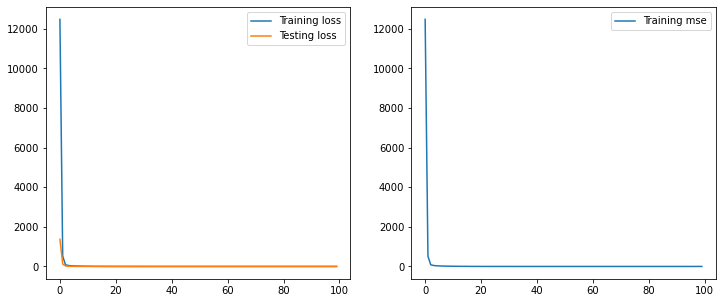

In [25]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_mse = history.history['mse']
test_mse = history.history['mse']

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].plot(train_loss, label='Training loss')
ax[0].plot(test_loss, label='Testing loss')
ax[0].legend()

ax[1].plot(train_loss, label='Training mse')
ax[1].legend();

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `ReLU` activation function.

In [26]:
X = cali_df.drop(columns=['price'])
y = cali_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
X_train.shape[1]

8

In [34]:
# 1. structure/topology
model = Sequential()
model.add(Dense(64, activation='relu',
                input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Output layer
model.add(Dense(1, activation=None))

# 2. Compile
model.compile(loss='mse', optimizer='adam', metrics='mse')

# 3. Fit
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test, y_test))

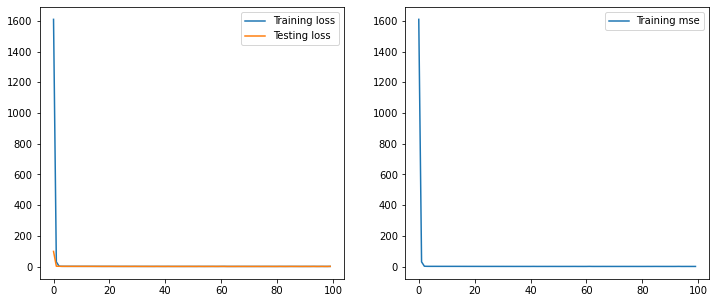

In [35]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_mse = history.history['mse']
test_mse = history.history['mse']

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].plot(train_loss, label='Training loss')
ax[0].plot(test_loss, label='Testing loss')
ax[0].legend()

ax[1].plot(train_loss, label='Training mse')
ax[1].legend();

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

In [36]:
# 1. structure/topology
model = Sequential()
model.add(BatchNormalization(input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Output layer
model.add(Dense(1, activation=None))

# 2. Compile
model.compile(loss='mse', optimizer='adam', metrics='mse')

# 3. Fit
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test, y_test))

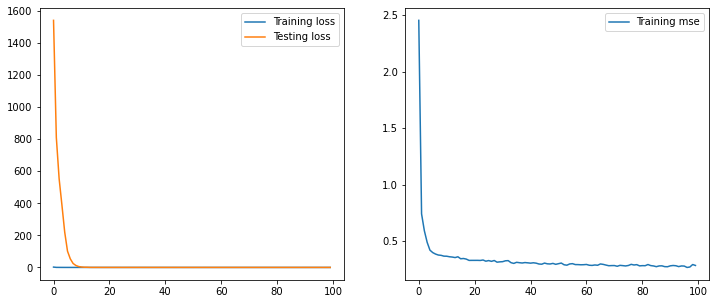

In [37]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_mse = history.history['mse']
test_mse = history.history['mse']

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].plot(train_loss, label='Training loss')
ax[0].plot(test_loss, label='Testing loss')
ax[0].legend()

ax[1].plot(train_loss, label='Training mse')
ax[1].legend();

##### Does this change anything?

In [ ]:
# Initial training mse is much lower than not using BatchNormalization layer.

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [56]:
es = EarlyStopping(patience=5)
# 1. structure/topology
model = Sequential()
model.add(BatchNormalization(input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Output layer
model.add(Dense(1, activation=None))

# 2. Compile
model.compile(loss='mse', optimizer='adam', metrics='mse')

# 3. Fit
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[es])

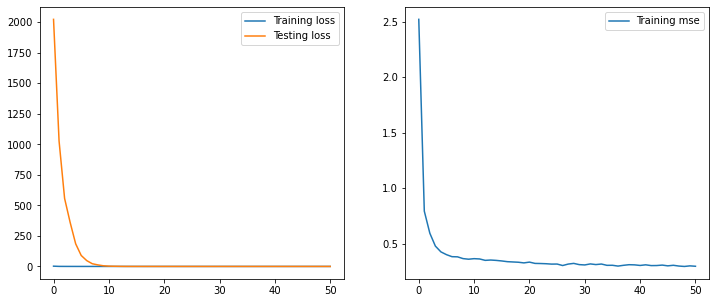

In [57]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_mse = history.history['mse']
test_mse = history.history['mse']

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].plot(train_loss, label='Training loss')
ax[0].plot(test_loss, label='Testing loss')
ax[0].legend()

ax[1].plot(train_loss, label='Training mse')
ax[1].legend();

In [60]:
print(f"Stopped epoch: {history.epoch[-1]}")
print(f"Training mse: {history.history['loss'][-1]}")
print(f"Test mse: {history.history['val_loss'][-1]}")

Stopped epoch: 50
Training mse: 0.29762303829193115
Test mse: 0.42568859457969666


In [ ]:
# The appropiate epochs is about 10, but the earlystopping stop the model at about 50th epochs.

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [61]:
es = EarlyStopping(patience=5)
# 1. structure/topology
model = Sequential()
model.add(BatchNormalization(input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(1, activation=None))

# 2. Compile
model.compile(loss='mse', optimizer='adam', metrics='mse')

# 3. Fit
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[es])

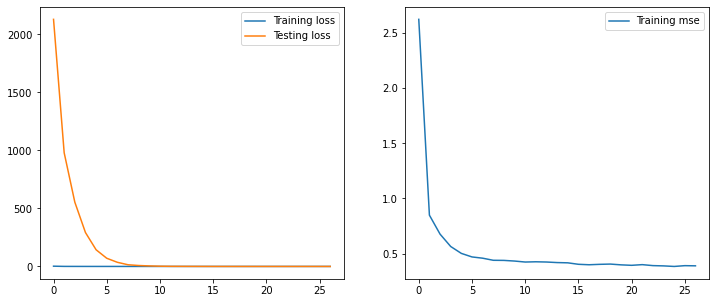

In [62]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_mse = history.history['mse']
test_mse = history.history['mse']

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].plot(train_loss, label='Training loss')
ax[0].plot(test_loss, label='Testing loss')
ax[0].legend()

ax[1].plot(train_loss, label='Training mse')
ax[1].legend();

In [63]:
print(f"Stopped epoch: {history.epoch[-1]}")
print(f"Training mse: {history.history['loss'][-1]}")
print(f"Test mse: {history.history['val_loss'][-1]}")

Stopped epoch: 26
Training mse: 0.3888024687767029
Test mse: 0.4271421432495117


In [ ]:
# The model stop earier than previous model but the training mse is higher than previous model.

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [67]:
y_test.shape

(5160,)

In [69]:
y_test_mean = y_test.mean()
y_test_mean

2.0631859147286704

In [71]:
y_baseline = pd.Series([y_test_mean for i in range(len(y_test))])
y_baseline.shape

(5160,)

In [73]:
y_baseline.head()

0    2.063186
1    2.063186
2    2.063186
3    2.063186
4    2.063186
dtype: float64

In [74]:
# RMSE
print(f"Test rmse: {np.sqrt(history.history['val_loss'][-1])}")
print(f"Baseline rmse: {mean_squared_error(y_test, y_baseline, squared=False)}")

Test rmse: 0.6535611243407243
Baseline rmse: 1.1503121771558869


In [ ]:
# RMSE from NN model is better than baseline model.

### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [75]:
es = EarlyStopping(patience=5)
# 1. structure/topology
model = Sequential()
model.add(BatchNormalization(input_shape=(8,)))
model.add(Dense(64, activation='relu',
                kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu',
                kernel_regularizer=l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu',
                kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(1, activation=None))

# 2. Compile
model.compile(loss='mse', optimizer='adam', metrics='mse')

# 3. Fit
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[es])

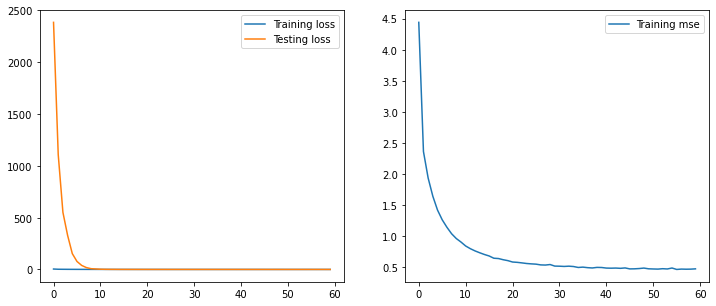

In [76]:
# Visualize the loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_mse = history.history['mse']
test_mse = history.history['mse']

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].plot(train_loss, label='Training loss')
ax[0].plot(test_loss, label='Testing loss')
ax[0].legend()

ax[1].plot(train_loss, label='Training mse')
ax[1].legend();

In [77]:
# RMSE
print(f"Test rmse: {np.sqrt(history.history['val_loss'][-1])}")
print(f"Baseline rmse: {mean_squared_error(y_test, y_baseline, squared=False)}")

Test rmse: 0.7032453434000396
Baseline rmse: 1.1503121771558869


In [ ]:
# RMSE from regularized NN model is better than baseline model.

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [78]:
# model.save('cali_housing.h5')